In [892]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [893]:
df_bilt = pd.read_csv('/Users/georgepetropoulos/Desktop/de_bilt_weather.csv')

In [894]:
correlations = df_bilt[['sunshine', 'humidity', 'precipitation', 'wind_speed', 'wind_gust', 'cloud_cover', 'temp_mean','pressure', 'global_radiation']].corr()
print(correlations)

                  sunshine  humidity  precipitation  wind_speed  wind_gust  \
sunshine          1.000000 -0.721761      -0.291868   -0.209073  -0.161435   
humidity         -0.721761  1.000000       0.278561   -0.070804  -0.059269   
precipitation    -0.291868  0.278561       1.000000    0.280795   0.399627   
wind_speed       -0.209073 -0.070804       0.280795    1.000000   0.859245   
wind_gust        -0.161435 -0.059269       0.399627    0.859245   1.000000   
cloud_cover      -0.824855  0.559006       0.328710    0.230350   0.228637   
temp_mean         0.363065 -0.374882       0.039337   -0.111357  -0.007917   
pressure          0.257221 -0.134714      -0.388966   -0.391760  -0.432313   
global_radiation  0.858166 -0.725564      -0.179438   -0.237521  -0.132919   

                  cloud_cover  temp_mean  pressure  global_radiation  
sunshine            -0.824855   0.363065  0.257221          0.858166  
humidity             0.559006  -0.374882 -0.134714         -0.725564  
precip

In [895]:
# define fit function without error
def fit_lrm(x, alfa, beta):
    return alfa + beta*x

In [896]:
#wind_speed

x_ws = df_bilt['wind_speed'][:-1].reset_index(drop = True)
y_ws = df_bilt['wind_speed'][1:].reset_index(drop = True)

params_ws, _ = scipy.optimize.curve_fit(fit_lrm, x_ws, y_ws)
alfa_ws, beta_ws = params_ws

residuals_ws = y_ws - fit_lrm(x_ws, alfa_ws, beta_ws)
sigma_ws = np.sqrt(np.sum(residuals_ws**2) / (len(x_ws) - 2)) 

In [897]:
#wind_gust

x_wg = df_bilt['wind_gust'][:-1].reset_index(drop = True)
y_wg = df_bilt['wind_gust'][1:].reset_index(drop = True)

params_wg, _ = scipy.optimize.curve_fit(fit_lrm, x_wg, y_wg)
alfa_wg, beta_wg = params_wg

residuals_wg = y_wg - fit_lrm(x_wg, alfa_wg, beta_wg)
sigma_wg = np.sqrt(np.sum(residuals_wg**2) / (len(x_wg) - 2))  

In [898]:
#humidity

x_hd = df_bilt['humidity'][:-1].reset_index(drop = True)
y_hd = df_bilt['humidity'][1:].reset_index(drop = True)

params_hd, _ = scipy.optimize.curve_fit(fit_lrm, x_hd, y_hd)
alfa_hd, beta_hd = params_hd

residuals_hd = y_hd - fit_lrm(x_hd, alfa_hd, beta_hd)
sigma_hd = np.sqrt(np.sum(residuals_hd**2) / (len(x_hd) - 2)) 

<ErrorbarContainer object of 3 artists>

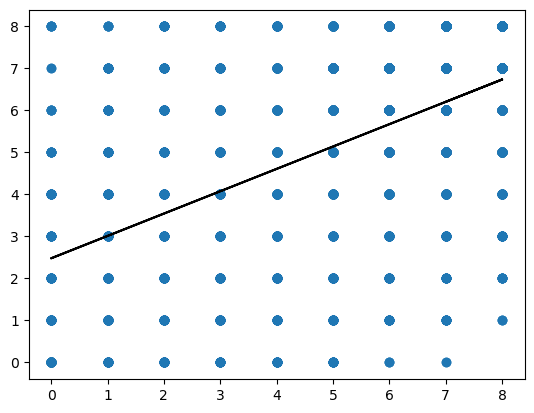

In [899]:
#cloud cover
#Non-linear, Polynomial fit?

x_cc = df_bilt['cloud_cover'][:-1].reset_index(drop = True)
y_cc = df_bilt['cloud_cover'][1:].reset_index(drop = True)

params_cc, _ = scipy.optimize.curve_fit(fit_lrm, x_cc, y_cc)
alfa_cc, beta_cc = params_cc

residuals_cc = y_cc - fit_lrm(x_cc, alfa_cc, beta_cc)
sigma_cc = np.sqrt(np.sum(residuals_cc**2) / (len(x_cc) - 2))  # -2 because 2 params (alfa, beta)

plt.errorbar(df_bilt['cloud_cover'][:-1], df_bilt['cloud_cover'][1:], fmt='o', color='tab:blue')
plt.errorbar(df_bilt['cloud_cover'][:-1], fit_lrm(df_bilt['cloud_cover'][:-1], alfa_cc, beta_cc), fmt='-', color='black')